In [1]:
import cv2
import numpy as np

### Image Resizing

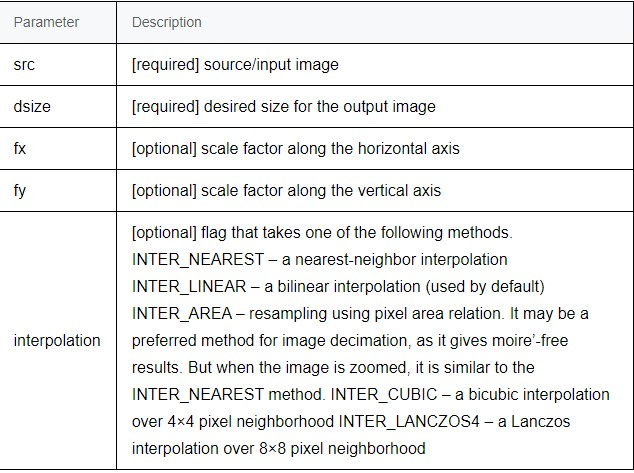

In [3]:
img = cv2.imread("Images/tomato.jpg")

half = cv2.resize(src=img, dsize=(0,0), fx=0.1, fy=0.2)

cv2.imshow("Image", half)
cv2.waitKey(0)
cv2.destroyAllWindows()

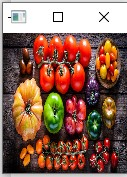

In [4]:
bigger  = cv2.resize(src=img, dsize=(800,800))

cv2.imshow("Image", bigger )
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
stretch_near = cv2.resize(src=img, dsize=(500,450), interpolation= cv2.INTER_NEAREST)

cv2.imshow("Image", stretch_near)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Erode

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. cv2.erode() method is used to perform erosion on the image. The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

### Bordering

In [6]:
img = cv2.imread("Images/girl-mask.jpg")

img = cv2.copyMakeBorder(src=img, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=0)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

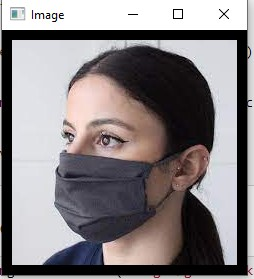

In [7]:
img = cv2.imread("Images/girl-mask.jpg")

img = cv2.copyMakeBorder(src=img, top=10, bottom=10, left=10, right=10,
                         borderType=cv2.BORDER_REFLECT, value=0)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

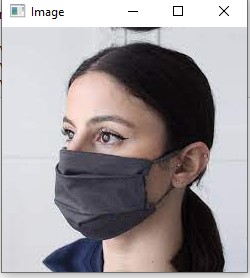

## Image Pyramid using OpenCV

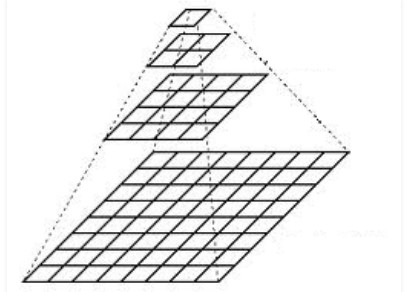

In [2]:
import matplotlib.pyplot as plt

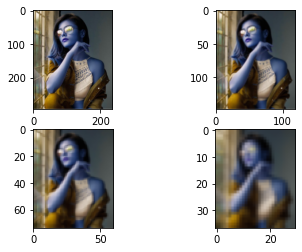

In [10]:
image = cv2.imread(filename="Images/girl.png")

layer = image.copy()

for i in range(4):
    plt.subplot(2, 2, i+1)
    
    # using pyrDown() function
    layer = cv2.pyrDown(src=layer)
    plt.imshow(layer)
    cv2.imshow(winname=f"{str(i)}", mat=layer)
    cv2.waitKey()

cv2.destroyAllWindows()

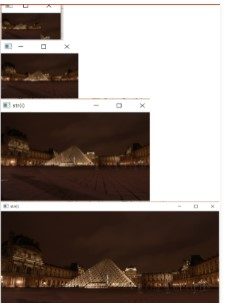

## Image blurring using OpenCV

### Please Read the pdf

In [21]:
original_img = cv2.imread(filename="Images/girl.png")

# Gaussian Blur
gaussaian = cv2.GaussianBlur(src=original_img, ksize=(7,7), sigmaX=0)

# Median Blur
median = cv2.medianBlur(src=image, ksize=5)
  
# Bilateral Blur

bilateral = cv2.bilateralFilter(src=image, d=9, sigmaColor=75, sigmaSpace=75)

horizontal_stake = np.hstack((gaussaian, median, bilateral))

horizontal_stake = cv2.resize(src=horizontal_stake, dsize=(800,300))

cv2.imshow(winname="All Images", mat=horizontal_stake)
cv2.waitKey()

cv2.destroyAllWindows()

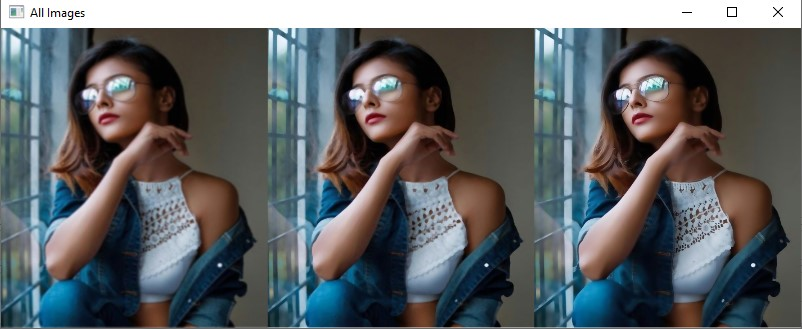

## Image Translation using OpenCV

In [8]:
image = cv2.imread("Images/girl.png")

image = cv2.resize(src=image, dsize=(500,500))

height, width = image.shape[0:2]

quarter_height, quarter_width = height / 4, width / 4

T = np.float32([ [1, 0, quarter_width], [0, 1, quarter_height] ])

# We use warpAffine to transform the image using matrix, T

img_translation = cv2.warpAffine(src=image, M=T, dsize=(width, height))

result = np.hstack((image, img_translation))

cv2.imshow(winname="Original and translate image", mat=result)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
print(image.shape[:2])

(590, 474)


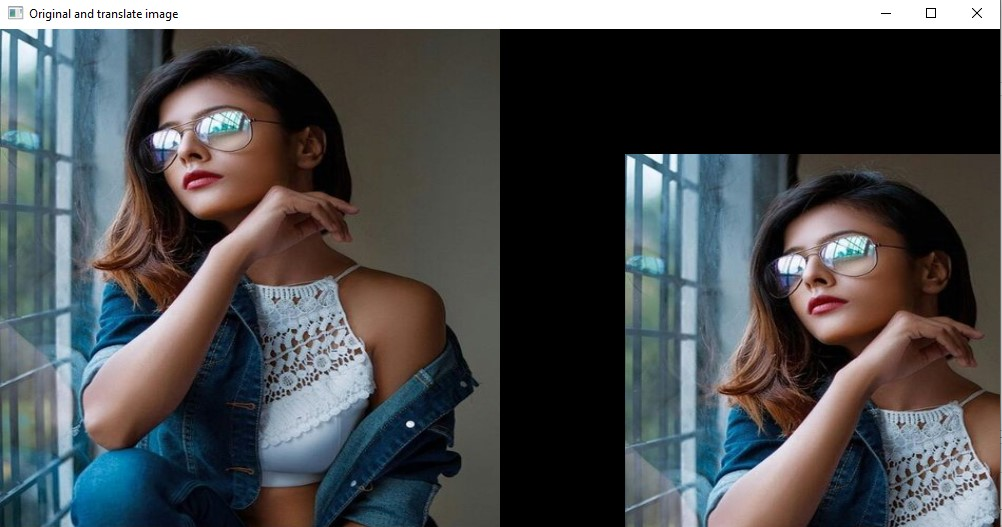

## Filter Color with OpenCV

Colour segmentation or color filtering is widely used in OpenCV for identifying specific objects/regions having a specific color. The most widely used color space is RGB color space, it is called an additive color space as the three color shades add up to give color to the image. To identify a region of a specific color, put the threshold and create a mask to separate the different colors. HSV color space is much more useful for this purpose as the colors in HSV space are much more localized thus can be easily separated. Color Filtering has many applications and uses cases such as in Cryptography, infrared analysis, food preservation of perishable foods, etc. In such cases, the concepts of Image processing can be used to find out or extract out regions of a particular color. 
For color segmentation, all we need is the threshold values or the knowledge of the lower bound and upper bound range of colors in one of the color spaces. It works best in the Hue-Saturation-Value color space. 
After specifying the range of color to be segmented, it is needed to create a mask accordingly and by using it, a particular region of interest can be separated out.

In [4]:
cap_video = cv2.VideoCapture(0)

cap_video.set(propId=3, value=350)
cap_video.set(propId=4, value=350)

while True:
    success, frame = cap_video.read()
    if success == True:
        # It converts the BGR color space of image to HSV color space
        hsv = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2HSV)
        
        # Threshould of blue in HSV space
        lower_blue = np.array([60, 35, 140])
        upper_blue = np.array([180, 255, 255])
        
        # Preparing the mask to overlay
        mask = cv2.inRange(src=hsv, lowerb=lower_blue, upperb=upper_blue)
        
        # The black region in the mask has the value of 0,
        # so when multiplied with original image removes all non-blue regions
        
        # Syntax: bitwise_and(src1, src2[, dst[, mask]]) -> dst
        result = cv2.bitwise_and(src1=frame, src2=frame, mask=mask)
        
        cv2.imshow(winname='frame', mat= frame)
        cv2.imshow(winname='mask',  mat=mask)
        cv2.imshow(winname='result', mat=result)
     
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break


cv2.destroyAllWindows()
cap_video.release()